In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

EXPLORATORY DATA ANALYSES

In [2]:
data_path = Path.cwd().parent/'cleaned_data'

In [3]:
for i in data_path.iterdir():
    print(i)

/Users/josephpruitt/Desktop/exp3/cleaned_data/exp3_7_cleaned.csv
/Users/josephpruitt/Desktop/exp3/cleaned_data/exp3_22_cleaned.csv
/Users/josephpruitt/Desktop/exp3/cleaned_data/.DS_Store
/Users/josephpruitt/Desktop/exp3/cleaned_data/exp3_10_cleaned.csv
/Users/josephpruitt/Desktop/exp3/cleaned_data/exp3_2_cleaned.csv
/Users/josephpruitt/Desktop/exp3/cleaned_data/exp3_19_cleaned.csv
/Users/josephpruitt/Desktop/exp3/cleaned_data/exp3_8_cleaned.csv
/Users/josephpruitt/Desktop/exp3/cleaned_data/exp3_13_cleaned.csv
/Users/josephpruitt/Desktop/exp3/cleaned_data/exp3_1_cleaned.csv
/Users/josephpruitt/Desktop/exp3/cleaned_data/exp3_21_cleaned.csv
/Users/josephpruitt/Desktop/exp3/cleaned_data/exp3_4_cleaned.csv
/Users/josephpruitt/Desktop/exp3/cleaned_data/exp3_16_cleaned.csv
/Users/josephpruitt/Desktop/exp3/cleaned_data/exp3_24_cleaned.csv
/Users/josephpruitt/Desktop/exp3/cleaned_data/exp3_18_cleaned.csv
/Users/josephpruitt/Desktop/exp3/cleaned_data/exp3_3_cleaned.csv
/Users/josephpruitt/Deskto

In [4]:
df = pd.read_csv(data_path/'all_pid_exp3_clean.csv')

values_to_remove = [2, 11, 14, 21, 25]

# Remove rows with 'participant' values in the 'values_to_remove' list
df = df[~df['participant'].isin(values_to_remove)]

In [5]:
df

,trialsN,participant,position,validity,Stimulus,response_key,response_rt,response_correct,confidence,degrees,trialsPos
0,1,1,-1716,Valid,signal,0,908.648994,0,2,30,1
1,2,1,1158,Valid,signal,1,914.136847,1,4,20,1
2,3,1,2274,Invalid,noise,0,918.505117,1,2,40,1
3,4,1,-1158,Valid,noise,0,923.800298,1,3,20,2
4,5,1,557,Valid,noise,0,927.624391,1,4,10,1
...,...,...,...,...,...,...,...,...,...,...,...
25595,1052,9,-1716,Valid,noise,0,7005.728258,1,4,30,262
25596,1053,9,-557,Invalid,signal,0,7010.032617,0,3,10,263
25597,1054,9,-557,Valid,signal,1,7013.904214,1,2,10,264
25598,1055,9,1716,Valid,noise,0,7018.352773,1,2,30,263


In [6]:
df['cum_n_corr'] = df.groupby(['participant'])['response_correct'].cumsum()
df['pos_cum_corr'] = df.groupby(['participant','degrees'])['response_correct'].cumsum()

In [7]:
df['t_acc'] = df['cum_n_corr']/df['trialsN']
df['pos_acc'] = df['pos_cum_corr']/df['trialsPos']

In [21]:
df['totalN'] = df.groupby('participant')['position'].transform('size')

In [35]:
df_signal = (df['Stimulus'] == 'signal')
df_noise = (df['Stimulus'] == 'noise')

In [36]:
len(df_signal)
len(df_noise)

20496

In [37]:
len(df_noise)

20496

In [47]:
acc_pos_sig = df.pivot_table(index='participant',columns=['degrees','validity'],values='response_correct')
acc_pos_sig

degrees            10                  20                  30            \
validity      Invalid     Valid   Invalid     Valid   Invalid     Valid   
participant                                                               
1            0.875000  0.879630  0.833333  0.902778  0.791667  0.782407   
3            0.916667  0.888889  0.833333  0.916667  0.833333  0.865741   
4            0.875000  0.930556  0.729167  0.782407  0.687500  0.666667   
5            1.000000  0.975460  0.842105  0.931250  0.852941  0.845679   
6            0.666667  0.787037  0.666667  0.638889  0.604167  0.699074   
7            0.958333  1.000000  0.958333  0.958333  0.958333  0.949074   
8            0.875000  0.861111  0.979167  0.953704  0.750000  0.740741   
9            0.625000  0.587963  0.604167  0.708333  0.520833  0.541667   
10           0.729167  0.791667  0.729167  0.782407  0.875000  0.689815   
12           0.541667  0.791667  0.645833  0.787037  0.645833  0.726852   
13           0.958333  0.990741  0.958333  0.981481  0.958333  0.972222   
16           0.583333  0.518519  0.833333  0.824074  0.812500  0.805556   
17           0.781250  0.840278  0.656250  0.687500  0.687500  0.666667   
18           0.770833  0.865741  0.916667  0.902778  0.708333  0.583333   
19           0.708333  0.944444  0.687500  0.930556  0.645833  0.921296   
20           0.937500  0.953704  0.875000  0.921296  0.812500  0.837963   
22           0.937500  0.972222  0.895833  0.986111  0.958333  0.967593   
23           0.562500  0.657407  0.750000  0.879630  0.770833  0.819444   
24           0.937500  0.976852  0.916667  0.949074  0.854167  0.916667   
26           0.958333  0.967593  0.916667  0.949074  0.958333  0.949074   

degrees            40            
validity      Invalid     Valid  
participant                      
1            0.625000  0.523148  
3            0.583333  0.564815  
4            0.562500  0.518519  
5            0.472222  0.493590  
6            0.458333  0.486111  
7            0.875000  0.875000  
8            0.479167  0.513889  
9            0.479167  0.546296  
10           0.520833  0.481481  
12           0.604167  0.555556  
13           0.791667  0.796296  
16           0.500000  0.523148  
17           0.437500  0.458333  
18           0.437500  0.500000  
19           0.520833  0.523148  
20           0.604167  0.643519  
22           0.708333  0.722222  
23           0.541667  0.481481  
24           0.666667  0.800926  
26           0.562500  0.611111

In [48]:
acc_pos = df.pivot_table(index='participant',columns='degrees',values='response_correct')
acc_pos

degrees,10,20,30,40
participant,,,,
1,0.878788,0.890152,0.784091,0.541667
3,0.893939,0.901515,0.859848,0.568182
4,0.920455,0.772727,0.670455,0.526515
5,0.979798,0.914141,0.846939,0.489583
6,0.765152,0.643939,0.681818,0.481061
7,0.992424,0.958333,0.950758,0.875000
8,0.863636,0.958333,0.742424,0.507576
9,0.594697,0.689394,0.537879,0.534091
10,0.780303,0.772727,0.723485,0.488636


In [49]:
df

,trialsN,participant,position,validity,Stimulus,response_key,response_rt,response_correct,confidence,degrees,trialsPos,totalN,cum_n_corr,pos_cum_corr,t_acc,pos_acc
0,1,1,-1716,Valid,signal,0,908.648994,0,2,30,1,1056,0,0,0.000000,0.000000
1,2,1,1158,Valid,signal,1,914.136847,1,4,20,1,1056,1,1,0.500000,1.000000
2,3,1,2274,Invalid,noise,0,918.505117,1,2,40,1,1056,2,1,0.666667,1.000000
3,4,1,-1158,Valid,noise,0,923.800298,1,3,20,2,1056,3,2,0.750000,1.000000
4,5,1,557,Valid,noise,0,927.624391,1,4,10,1,1056,4,1,0.800000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25595,1052,9,-1716,Valid,noise,0,7005.728258,1,4,30,262,1056,619,140,0.588403,0.534351
25596,1053,9,-557,Invalid,signal,0,7010.032617,0,3,10,263,1056,619,156,0.587844,0.593156
25597,1054,9,-557,Valid,signal,1,7013.904214,1,2,10,264,1056,620,157,0.588235,0.594697
25598,1055,9,1716,Valid,noise,0,7018.352773,1,2,30,263,1056,621,141,0.588626,0.536122


PERFORMANCE OVER TIME

/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert 

<Axes: xlabel='trialsN', ylabel='t_acc'>

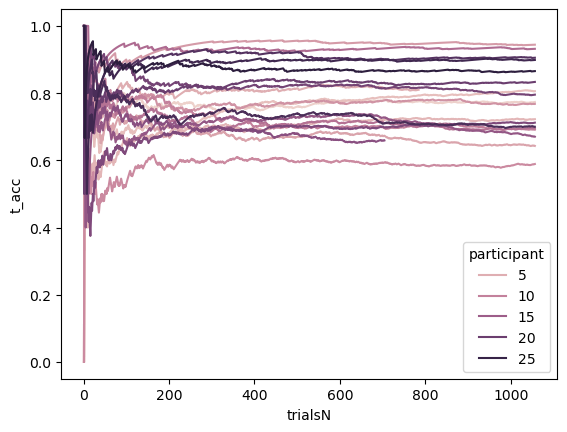

In [50]:
sns.lineplot(x='trialsN', y='t_acc', hue='participant', data=df)

/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/josephpruitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert 

<Axes: xlabel='trialsPos', ylabel='pos_acc'>

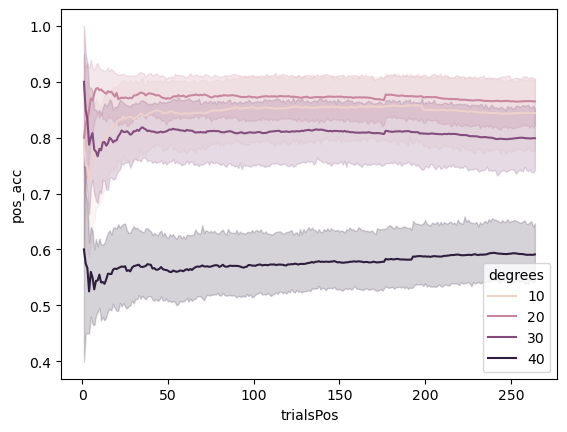

In [51]:
sns.lineplot(x='trialsPos', y='pos_acc', hue='degrees',data=df)

In [53]:
acc_pos.mean()

degrees
10    0.850126
20    0.858207
30    0.794998
40    0.579214
dtype: float64

In [54]:
acc_pos_sig.mean()

degrees  validity
10       Invalid     0.809896
         Valid       0.859074
20       Invalid     0.811376
         Valid       0.868669
30       Invalid     0.784314
         Valid       0.797377
40       Invalid     0.571528
         Valid       0.580929
dtype: float64

In [55]:
df['confidence'] = df['confidence'].astype('float') 

In [56]:
conf_pos = df.pivot_table(index='participant',columns=['degrees'],
                                      values='confidence')

conf_pos

degrees,10,20,30,40
participant,,,,
1,3.556818,3.106061,2.761364,1.731061
3,2.803030,2.689394,2.401515,1.393939
4,3.462121,3.079545,2.810606,2.409091
5,3.252525,2.560606,2.183673,1.994792
6,3.037879,2.882576,2.935606,2.772727
7,3.712121,3.280303,3.060606,2.431818
8,2.818182,2.397727,2.204545,2.053030
9,3.231061,2.875000,2.803030,2.321970
10,2.939394,2.875000,2.583333,1.742424


In [57]:
df.trialsPos.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [61]:
#Delta Confidence

part = df.participant.unique()
deg = df.degrees.unique()
valid = df.validity.unique()
data_list = []

for i in part:
    for d in deg:
        for v in valid:
            subj_v_i_d = df.loc[(df['participant']==i)&(df['validity']==v)&(df['degrees']==d)]
            
            data_accuracy_correct = subj_v_i_d[subj_v_i_d['response_correct'] == 1]
            data_accuracy_incorrect = subj_v_i_d[subj_v_i_d['response_correct'] == 0]
            
            correct_conf = data_accuracy_correct['confidence'].mean()
            incorrect_conf = data_accuracy_incorrect['confidence'].mean()
            delta_confidence = incorrect_conf - correct_conf

            data_list.append({'participant': i, 'validity': v, 'degrees': d, 'delta confidence': delta_confidence})

md_conf = pd.DataFrame(data_list)

In [62]:
md_conf

,participant,validity,degrees,delta confidence
0,1,Valid,30,-1.066222
1,1,Invalid,30,-0.410526
2,1,Valid,20,-0.512821
3,1,Invalid,20,-1.200000
4,1,Valid,40,-0.107140
...,...,...,...,...
155,9,Invalid,20,-0.232305
156,9,Valid,40,-0.012279
157,9,Invalid,40,-0.003478
158,9,Valid,10,-0.188003
